# Introducción


El objetivo de este ejercicio es segmentar la región correspondiente a los pulmones en una imagen de CT.



## Descarga y descompresión de datos de CT

Para ello, tendremos que emplear un método (`gdown`) para descargar los datos de Google Drive. Esto nos descargará una carpeta llamada Images.

In [5]:
!pip install gdown
!gdown https://drive.google.com/uc?id=1qNpH_0BEy-JJE5VMNfb8kuNN2KfsFLsi
!unzip Images.zip

Downloading...
From: https://drive.google.com/uc?id=1qNpH_0BEy-JJE5VMNfb8kuNN2KfsFLsi
To: /content/Images.zip
100% 7.85M/7.85M [00:00<00:00, 22.9MB/s]
Archive:  Images.zip
   creating: Images/
  inflating: Images/slice001.nii.gz  
  inflating: Images/slice002.nii.gz  
  inflating: Images/slice003.nii.gz  
  inflating: Images/slice004.nii.gz  
  inflating: Images/slice005.nii.gz  
  inflating: Images/slice006.nii.gz  
  inflating: Images/slice007.nii.gz  
  inflating: Images/slice008.nii.gz  
  inflating: Images/slice009.nii.gz  
  inflating: Images/slice010.nii.gz  
  inflating: Images/slice011.nii.gz  
  inflating: Images/slice012.nii.gz  
  inflating: Images/slice013.nii.gz  
  inflating: Images/slice014.nii.gz  
  inflating: Images/slice015.nii.gz  
  inflating: Images/slice016.nii.gz  
  inflating: Images/slice017.nii.gz  
  inflating: Images/slice018.nii.gz  
  inflating: Images/slice019.nii.gz  
  inflating: Images/slice020.nii.gz  
  inflating: Images/slice021.nii.gz  


In [6]:
pip install --upgrade scikit-image

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


Cargamos todas las bibliotecas/frameworks que necesitaremos. Especial interés tiene nibabel, pues permite trabajar específicamente con formatos de imágenes biomédicos (que poseen gran resolución)

In [7]:
import os
import shutil

import matplotlib.pyplot as plt
# https://nipy.org/nibabel/gettingstarted.html
import nibabel as nib
import numpy as np
from PIL import Image, ImageDraw
from scipy.spatial import ConvexHull
from skimage import measure

import glob
import csv

Leemos ahora las imágenes y pintamos por pantalla alguna para ver el aspecto que tienen.

In [8]:
# Este es el patrón que siguen nuestras imágenes dentro de la carpeta Images
paths = sorted(glob.glob('./Images/slice*.nii.gz'))
print('¿Cuántas imágenes hay?:', len(paths))

# Cargamos la imagen (elegimos un número cualquiera entre 0 y 20)
ct_img = nib.load(paths[5]).get_fdata()

¿Cuántas imágenes hay?: 21


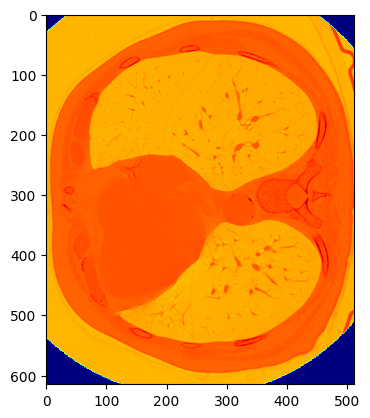

In [ ]:
# Pintamos por pantalla la imagen que vemos
plt.imshow(ct_img, 'jet')

In [ ]:
# TODO: ¿Qué valores únicos tiene?
# TODO: Tamaño de la imagen

Estas imágenes, tienen un rango muy amplio (como hemos visto, no van desde 0 a 255, sino que tienen un espectro mucho mayor).

Con lo cual, vamos a quedarnos con un intervalo de intensidades (p.e., las intensidades entre 100 y 200).

Vamos a hacer una función que se llame: `image_slicer`
 que tenga tres parámetros de entrada:

- La imagen (nombre de la variable de la imagen)
- Valor mínimo (en nuestro ejemplo, 100)
- Valor máximo (en nuestro ejemplo, 200)

Y devolverá una imagen con:
- Todo ceros (para las intensidades fuera del intervalo anterior)
- El valor que tenga el píxel si su intensidad está dentro del intervalo

Pista: Se resuelve con un comando

In [ ]:
# TODO
def image_slicer(img, valor_min, valor_max):
  pass
  return imagen_resultado

Genial. Ahora muestra por pantalla el resultado de llamar al método anterior con diferentes valores (p.e., `image_slicer(img, -700, 600)`)

In [ ]:
# TODO

# Método de Segmentación 1: Umbralización con Otsu

Hemos visto el método de Otsu para dividir una imagen en dos partes.

Vamos a investigar ahora el método `threshold_multiotsu` para:

- Ver qué hace
- Usarlo para el caso conreto de dividir la imagen en tres regiones

¿Cómo de buena es la segmentación en este caso?

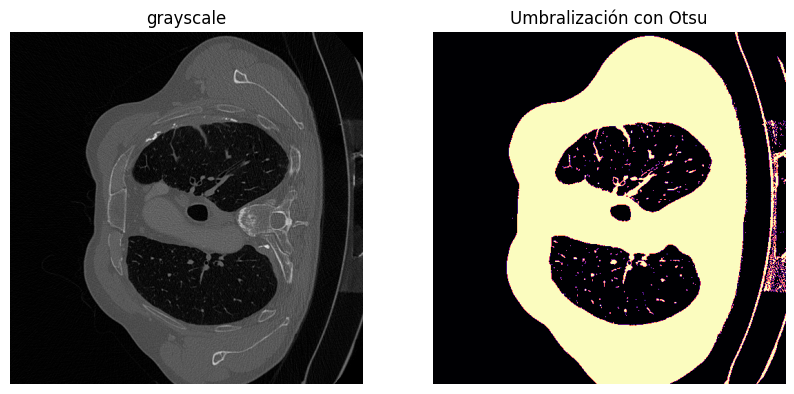

In [ ]:
# NO EJECUTAR SI QUEREIS SEGUIR# NO EJECUTAR SI QUEREIS SEGUIR VIENDO LA IMAGEN VIENDO LA IMAGEN

# Método de Segmentación 2: Edge-based Segmentation

Otra alternativa es probar la segmentación basada en bordes con múltiples alternativas: Sobel, Canny, ...

Recordad que esta segmentación nos debería de devolver muchísimos segmentos (puesto que la detección de bordes produce multitud de bordes).

In [1]:
from skimage.feature import canny
from skimage.filters import sobel, roberts
from scipy import ndimage as ndi
from skimage import morphology

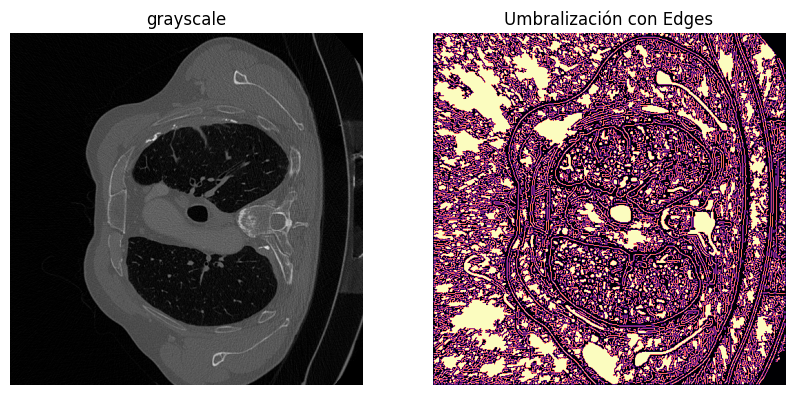

In [ ]:
# NO EJECUTAR SI QUEREIS SEGUIR VIENDO LA IMAGEN

# Método de Segmentación 3: Contornos Activos

Ahora vamos a probar otros métodos de segmentación: Contornos Activos.

Aunque hay muchas implementaciones (especialmente si buscáis en ChatGPT), me gustaría que nos centráramos en estas dos:

- `morphological_chan_vese`
- `morphological_geodesic_active_contour`

Lo importante de este punto es encontrar (y entender) la combinación adecuada de parámetros. Aviso, si buscas código de ChatGPT aquí funcionará pero es probable que obtengas malos resultados.

Mi recomendación es que encuentres el código que funciona y entiendas los parámetros que harán que la curva se adapte mejor. Para ambas cosas sí puedes usar ChatGPT.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import (morphological_chan_vese,
                                  morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  checkerboard_level_set)

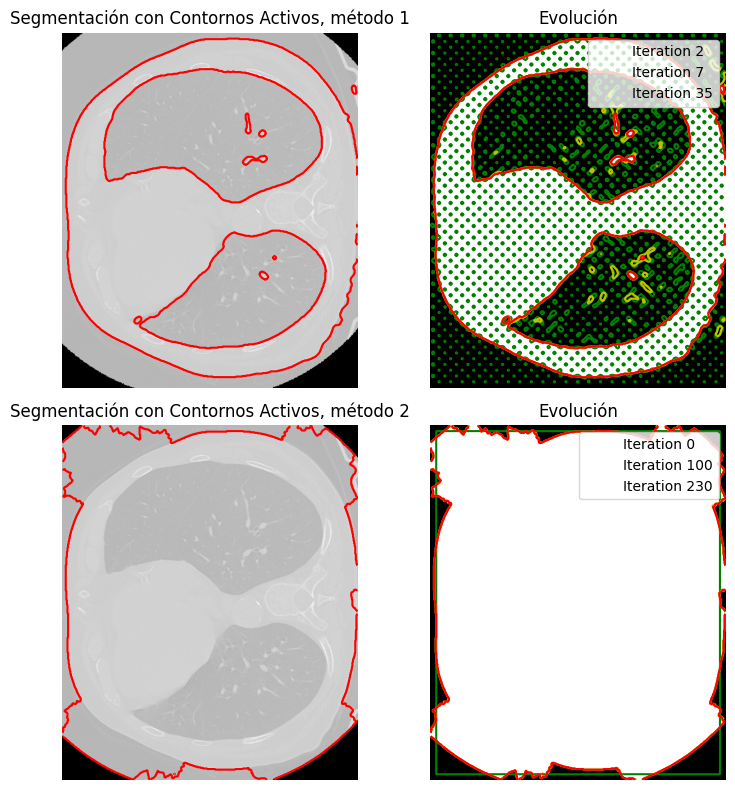

In [9]:
# NO EJECUTAR SI QUEREIS SEGUIR VIENDO LA IMAGEN

# Método de Segmentación 4: Super-Píxels (SLIC)

Por último, vamos a probar métodos de segmentación basados en Super-Pixeles, concretamente SLIC.

Al igual que antes, lo importante de este punto es encontrar (y entender) la combinación adecuada de parámetros. Aviso, si buscas código de ChatGPT aquí funcionará pero es probable que obtengas malos resultados.

Mi recomendación es que encuentres el código que funciona y entiendas los parámetros que harán que la curva se adapte mejor. Para ambas cosas sí puedes usar ChatGPT.

Pista - busca qué es el campo `mask` de `SLIC` y úsalo para obtener buenos resultados.

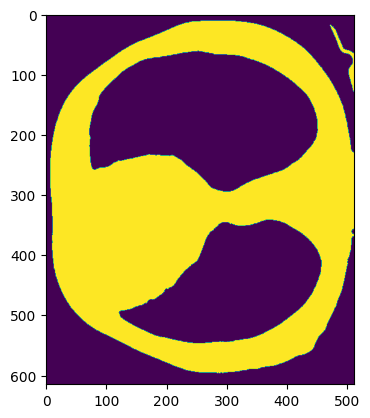

In [ ]:
# NO EJECUTAR SI QUEREIS SEGUIR VIENDO LA IMAGEN

# Último paso: ¿Cómo me quedo con la parte de los pulmones?

Aquí sólo queda pensar y darle vueltas a posibles operaciones que podemos hacer con matrices.

Como pista, podéis usar `regionprops` y `label`, así como otras operaciones dentro de `ndi` (ver más arriba)

In [ ]:
from skimage.measure import regionprops, label

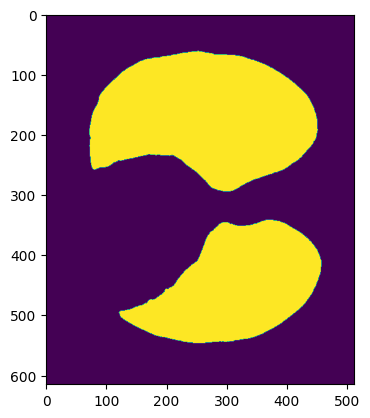

In [ ]:
# NO EJECUTAR SI QUEREIS SEGUIR VIENDO LA IMAGEN

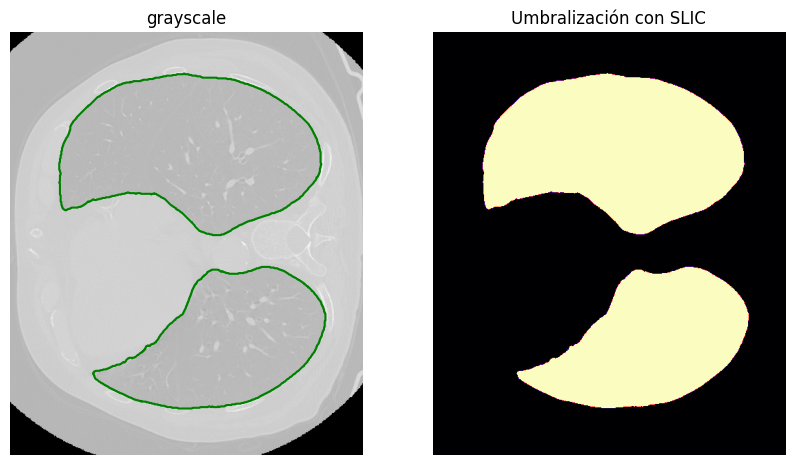

In [ ]:
# NO EJECUTAR SI QUEREIS SEGUIR VIENDO LA IMAGEN